In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns


In [59]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

X_train = pd.read_csv('dataset/spectra-train.csv',sep = ';', header=None)
y_train = pd.read_csv('dataset/meta-train.csv',sep = ';')
X_test = pd.read_csv('dataset/spectra-test.csv',sep = ';', header=None)
y_test = pd.read_csv('dataset/meta-test.csv',sep = ';')

# Statistique descriptive

In [60]:
# show info
n1 = X_train.shape[0]
p1 = X_train.shape[1]

n2 = X_test.shape[0]
p2 = X_test.shape[1]
K = 9
print('Le jeu de donnée chargé est de taille %d x %d et %d x %d impliquant %d classes' % (n1,p1,n2,p2,K))

Le jeu de donnée chargé est de taille 3114 x 627 et 1197 x 627 impliquant 9 classes


In [61]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,617,618,619,620,621,622,623,624,625,626
0,0.037,0.147,0.272,0.354,0.348,0.364,0.438,0.594,0.722,0.813,...,1.273,0.930,0.408,0.000,0.002,0.269,0.169,0.254,0.235,0.393
1,0.164,0.360,0.402,0.330,0.267,0.313,0.465,0.571,0.660,0.742,...,1.414,1.221,0.865,0.406,0.119,0.000,0.036,0.000,0.084,0.236
2,0.317,0.373,0.255,0.279,0.423,0.539,0.547,0.494,0.559,0.760,...,1.391,1.313,1.260,1.030,0.513,0.150,0.000,0.283,0.833,1.023
3,0.091,0.071,0.174,0.443,0.564,0.444,0.362,0.312,0.470,0.699,...,0.954,0.627,0.330,0.186,0.155,0.003,0.052,0.092,0.097,0.096
4,0.158,0.362,0.280,0.203,0.342,0.562,0.694,0.698,0.589,0.666,...,1.323,1.232,0.994,0.552,0.353,0.232,0.188,0.091,0.000,0.374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,0.198,0.163,0.197,0.055,0.019,0.173,0.542,0.752,0.955,0.878,...,1.282,0.558,0.107,0.000,0.153,0.169,0.152,0.160,0.000,0.015
3110,0.081,0.370,0.639,0.677,0.557,0.404,0.400,0.592,0.746,0.867,...,1.398,1.095,0.672,0.336,0.052,0.069,0.000,0.117,0.254,0.548
3111,0.129,0.298,0.396,0.429,0.578,0.617,0.742,0.980,1.041,1.192,...,0.995,1.087,0.931,0.900,0.540,0.083,0.000,0.171,0.124,0.292
3112,0.236,0.226,0.040,0.013,0.289,0.514,0.606,0.538,0.420,0.507,...,1.685,1.449,1.215,0.848,0.447,0.097,0.000,0.292,0.441,0.709


In [62]:
# show general properties
X_train.info()
X_test.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Columns: 627 entries, 0 to 626
dtypes: float64(627)
memory usage: 14.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Columns: 627 entries, 0 to 626
dtypes: float64(627)
memory usage: 5.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   species  3114 non-null   object
 1   strain   3114 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.8+ KB


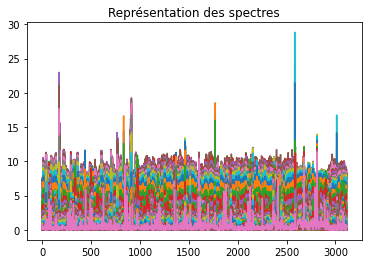

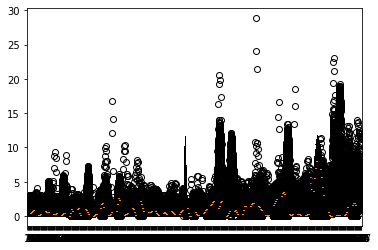

In [63]:
# Representations
#plt.subplot(121)
plt.plot(X_train)
plt.title('Représentation des spectres')
plt.show()

# barplot
#plt.subplot(122)
plt.boxplot(X_train)
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
def data_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    return data

X_train_scalar = data_scaler(X_train)

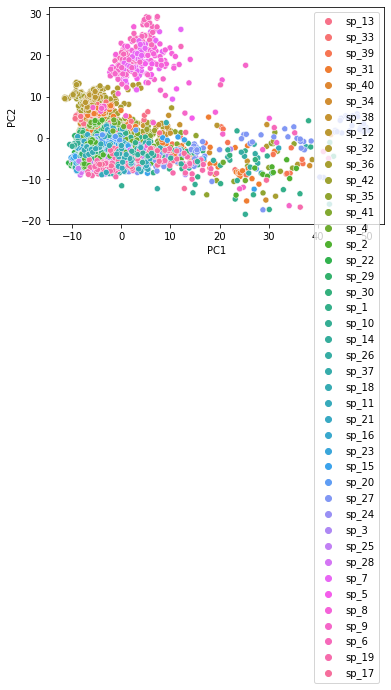

In [65]:
from sklearn.decomposition import PCA
import seaborn as sn
pca = PCA(n_components=100)
pca.fit(X_train)
coord = pca.fit_transform(X_train_scalar)
pca_frame = pd.DataFrame(coord[:,range(2)],columns=['PC1','PC2'])
pca_frame=pd.concat([pca_frame,pd.DataFrame(y_train,columns=['y'])],axis=1)
#plt.subplot(121)
sn.scatterplot(x='PC1',y='PC2',hue=y_train['species'],data=pca_frame)
plt.legend()
#plt.subplot(122)
#plt.plot(pca.explained_variance_,color="red")

In [66]:
strain = y_train['strain']
X_train['strain'] = strain
X_train_moy = X_train.groupby(["strain"]).median()

y_train_moy = y_train.groupby(["strain"]).first()

X_train_moy

,0,1,2,3,4,5,6,7,8,9,...,617,618,619,620,621,622,623,624,625,626
strain,,,,,,,,,,,,,,,,,,,,,
1,0.107,0.176,0.280,0.415,0.423,0.465,0.465,0.571,0.589,0.742,...,1.323,1.148,0.865,0.506,0.155,0.019,0.046,0.091,0.235,0.445
2,0.090,0.141,0.044,0.003,0.041,0.132,0.176,0.220,0.231,0.309,...,1.266,1.204,0.967,0.598,0.324,0.383,0.232,0.100,0.000,0.207
3,0.023,0.089,0.168,0.207,0.207,0.195,0.211,0.270,0.410,0.433,...,1.461,1.309,0.908,0.556,0.221,0.049,0.040,0.019,0.078,0.149
4,0.104,0.117,0.183,0.257,0.272,0.307,0.436,0.686,0.805,0.840,...,1.140,1.069,0.810,0.387,0.124,0.016,0.003,0.073,0.284,0.413
5,0.012,0.017,0.064,0.145,0.257,0.344,0.354,0.385,0.561,0.669,...,0.532,0.426,0.280,0.226,0.254,0.135,0.059,0.040,0.127,0.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.122,0.180,0.226,0.256,0.440,0.580,0.740,0.898,1.249,1.471,...,1.544,1.345,0.929,0.596,0.599,0.577,0.850,0.382,0.000,0.146
343,0.122,0.201,0.567,0.794,0.932,0.967,1.152,1.271,1.463,1.648,...,2.223,1.765,0.858,0.216,0.188,0.297,0.951,1.445,1.290,1.162
344,0.141,0.218,0.356,0.461,0.464,0.569,0.624,0.721,0.785,0.774,...,1.332,1.238,1.118,0.659,0.081,0.002,0.027,0.112,0.022,0.143


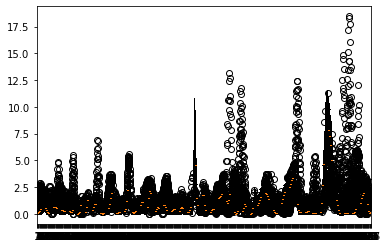

In [67]:
# barplot
#plt.subplot(122)
plt.boxplot(X_train_moy)
plt.show()

# Méthodes

In [68]:
y_train_moy

,species
strain,
1,sp_13
2,sp_33
3,sp_39
4,sp_31
5,sp_31
...,...
342,sp_11
343,sp_14
344,sp_18


In [69]:
# transform species as labels
train_label = y_train_moy['species']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_label)
train_label = le.transform(train_label)
train_label.shape

(346,)

In [70]:
X_train_moy_scaler = data_scaler(X_train_moy)


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_moy,train_label,test_size=0.2,random_state=42)

### Une fonction permettant de choisir un modéle

In [71]:
from sklearn.metrics import accuracy_score
def model_selection(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)
    return acc_score

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators=700,criterion="entropy") 
rand_f = model_selection(model_1,X_train,y_train,X_test,y_test)

In [73]:
print("accuracy_score = ",rand_f)

accuracy_score =  0.6857142857142857


## SVC

In [74]:
from sklearn.svm import SVC
model_2 = SVC(C=2,kernel="linear")
svc = model_selection(model_2,X_train,y_train,X_test,y_test)

In [75]:
print("accuracy_score = ",svc)

accuracy_score =  0.7857142857142857


In [107]:
# import packages
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
# import tensorflow requirements - depending on version

from keras import backend as K
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical



In [108]:
model_neuronal = Sequential()
n_classe = len(np.unique(train_label))
p = X_train.shape[1]
n_layers = 64
model_neuronal.add(Dense(n_layers,activation='relu',input_dim=p))
model_neuronal.add(Dense(n_classe,activation='softmax'))

In [78]:
X_train.shape[1]

627

In [109]:
model_neuronal.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                40192     
_________________________________________________________________
dense_19 (Dense)             (None, 42)                2730      
Total params: 42,922
Trainable params: 42,922
Non-trainable params: 0
_________________________________________________________________


In [110]:
model_neuronal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC']) 

In [111]:
#convert to one-hot encoding
Y_train = to_categorical(y_train)
Y_test  = to_categorical(y_test)

In [112]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping
# define callback to save best model
checkPointModel = ModelCheckpoint('logreg-with-early-stopping_best-model.h5', monitor = 'val_accuracy', 
                                  save_best_only = True, save_weights_only = False,
                                  mode = 'auto')
# define callback to save log file
csv_logger = CSVLogger('logreg-with-early-stopping_training-log.csv')
# define early stoppin callback
early_stop = EarlyStopping(monitor = 'accuracy', mode = 'min', patience = 100)

# set random seed
np.random.seed(123)

history = model_neuronal.fit(X_train, Y_train,
        validation_data = (X_test,Y_test),
        #class_weight={0: 2, 1: 1},
        batch_size=32, epochs=500, verbose=1, validation_split = 0.1,
        callbacks=[checkPointModel,csv_logger, early_stop])



Epoch 1/500
8/8 [==============================] - 1s 58ms/step - loss: 0.7434 - accuracy: 0.0121 - auc: 0.5088 - val_loss: 0.4120 - val_accuracy: 0.0000e+00 - val_auc: 0.5518
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 0.3177 - accuracy: 0.0000e+00 - auc: 0.5040 - val_loss: 0.1897 - val_accuracy: 0.0357 - val_auc: 0.5625
Epoch 3/500
8/8 [==============================] - 0s 11ms/step - loss: 0.1669 - accuracy: 0.0121 - auc: 0.4938 - val_loss: 0.1273 - val_accuracy: 0.0714 - val_auc: 0.5697
Epoch 4/500
8/8 [==============================] - 0s 9ms/step - loss: 0.1336 - accuracy: 0.0363 - auc: 0.5271 - val_loss: 0.1210 - val_accuracy: 0.0357 - val_auc: 0.6040
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 0.1249 - accuracy: 0.0444 - auc: 0.5695 - val_loss: 0.1165 - val_accuracy: 0.0357 - val_auc: 0.6129
Epoch 6/500
8/8 [==============================] - 0s 9ms/step - loss: 0.1155 - accuracy: 0.0685 - auc: 0.6133 - val_loss: 0.1117 - val

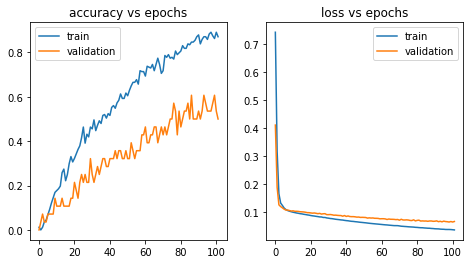

In [113]:
plt.figure(figsize=(12,4))

# show accuracy
plt.subplot(1,3,2)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.title("accuracy vs epochs")
plt.legend()
# show loss
plt.subplot(1,3,3)
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.title("loss vs epochs")
plt.legend()
plt.show()

In [84]:
model_neuronal_fit = model_neuronal.fit(X_train,Y_train,batch_size=32,epochs=50,verbose=1)

Epoch 1/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9493 - auc: 0.9938
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9420 - auc: 0.9956
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9529 - auc: 0.9956
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9348 - auc: 0.9956
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9384 - auc: 0.9977
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9529 - auc: 0.9977
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9420 - auc: 0.9997
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9565 - auc: 0.9997
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9674 - auc: 0.9980
Epoch 10/5

In [85]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session